In [144]:
import pandas as pd
import numpy as np
import csv
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [131]:
#Read csv data file and store in dataframe
df=pd.read_csv('UpdatedTorontoWeather.csv') 

In [132]:
df=df.drop(['month', 'day','year','date','min_windchill_v'], axis=1)

In [133]:
df

,day_of_year,max_dew_point_v,max_min_temperature_v,max_temperature_v,max_wind_gust_v,max_wind_speed_v,min_dew_point_v,min_max_temperature_v,min_relative_humidity_v,min_temperature_v,precipitation_v,rain_v,snow_v,snow_on_ground_v
0,97,14.0,15.6,27.6,87,57,-20.0,-5.0,18,-17.2,15.2,14.4,14.0,12
1,96,13.3,10.3,22.5,111,81,-15.6,-4.0,20,-11.7,28.2,27.8,10.4,13
2,95,10.9,9.9,23.1,96,58,-17.8,-2.1,24,-9.4,22.1,22.1,2.0,13
3,94,13.9,12.0,23.1,103,77,-19.4,-4.4,21,-11.7,18.0,18.0,7.5,13
4,93,14.4,7.2,22.2,85,60,-21.1,-3.3,26,-12.2,40.2,40.2,17.5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,198,24.1,24.1,36.8,98,61,2.9,21.1,22,6.1,31.8,31.8,0.0,0
996,197,23.9,23.8,34.7,63,37,5.6,21.1,27,7.2,25.9,25.9,0.0,0
997,196,26.6,22.3,35.7,74,59,3.5,17.2,27,6.7,40.5,40.5,0.0,0
998,195,26.4,23.6,36.8,85,48,0.1,16.1,24,7.8,32.5,32.5,0.0,0


In [134]:
conditions = [
    (df['day_of_year'] > 59) & (df['day_of_year'] <= 150),
    (df['day_of_year'] > 151) & (df['day_of_year'] <= 242),
    (df['day_of_year'] > 243) & (df['day_of_year'] <= 333),
    (df['day_of_year'] > 333),
    (df['day_of_year'] <= 59)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2', '3', '4','4'] #Spring=1 Summer=2 Fall=3 Winter=4

# create a new column and use np.select to assign values to it using our lists as arguments
df['Season'] = np.select(conditions, values)
df["Season"] = pd.to_numeric(df["Season"])

In [135]:
df.dtypes

day_of_year                  int64
max_dew_point_v            float64
max_min_temperature_v      float64
max_temperature_v          float64
max_wind_gust_v              int64
max_wind_speed_v             int64
min_dew_point_v            float64
min_max_temperature_v      float64
min_relative_humidity_v      int64
min_temperature_v          float64
precipitation_v            float64
rain_v                     float64
snow_v                     float64
snow_on_ground_v             int64
Season                       int64
dtype: object

In [136]:
df = df.drop('day_of_year', axis=1)
df

,max_dew_point_v,max_min_temperature_v,max_temperature_v,max_wind_gust_v,max_wind_speed_v,min_dew_point_v,min_max_temperature_v,min_relative_humidity_v,min_temperature_v,precipitation_v,rain_v,snow_v,snow_on_ground_v,Season
0,14.0,15.6,27.6,87,57,-20.0,-5.0,18,-17.2,15.2,14.4,14.0,12,1
1,13.3,10.3,22.5,111,81,-15.6,-4.0,20,-11.7,28.2,27.8,10.4,13,1
2,10.9,9.9,23.1,96,58,-17.8,-2.1,24,-9.4,22.1,22.1,2.0,13,1
3,13.9,12.0,23.1,103,77,-19.4,-4.4,21,-11.7,18.0,18.0,7.5,13,1
4,14.4,7.2,22.2,85,60,-21.1,-3.3,26,-12.2,40.2,40.2,17.5,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24.1,24.1,36.8,98,61,2.9,21.1,22,6.1,31.8,31.8,0.0,0,2
996,23.9,23.8,34.7,63,37,5.6,21.1,27,7.2,25.9,25.9,0.0,0,2
997,26.6,22.3,35.7,74,59,3.5,17.2,27,6.7,40.5,40.5,0.0,0,2
998,26.4,23.6,36.8,85,48,0.1,16.1,24,7.8,32.5,32.5,0.0,0,2


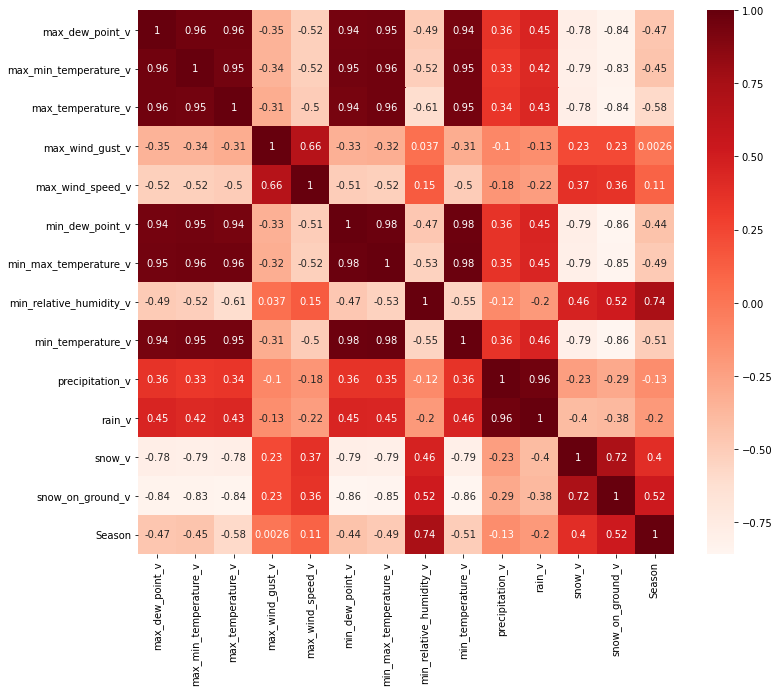

In [145]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [147]:
#Correlation with output variable
cor_target = abs(cor["Season"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

max_temperature_v          0.584458
min_relative_humidity_v    0.735465
min_temperature_v          0.505891
snow_on_ground_v           0.522310
Season                     1.000000
Name: Season, dtype: float64

In [148]:
X = df[['max_temperature_v','min_relative_humidity_v','snow_on_ground_v']]
y = df['Season']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [150]:
#pca = PCA(n_components=2)# adjust yourself
#pca.fit(X_train)
#X_t_train = pca.transform(X_train)
#X_t_test = pca.transform(X_test)
#clf = SVC()
#clf.fit(X_t_train, y_train)
#y_pred=clf.predict(X_t_test)
#print ('score', clf.score(X_t_test, y_test))
#print ('pred label', clf.predict(X_t_test))

In [151]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [152]:
y_pred = svclassifier.predict(X_test)

In [153]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[36  2  1  1]
 [ 2 47  2  0]
 [ 5  8 45  1]
 [ 0  0  4 46]]
              precision    recall  f1-score   support

           1       0.84      0.90      0.87        40
           2       0.82      0.92      0.87        51
           3       0.87      0.76      0.81        59
           4       0.96      0.92      0.94        50

    accuracy                           0.87       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.87      0.87      0.87       200



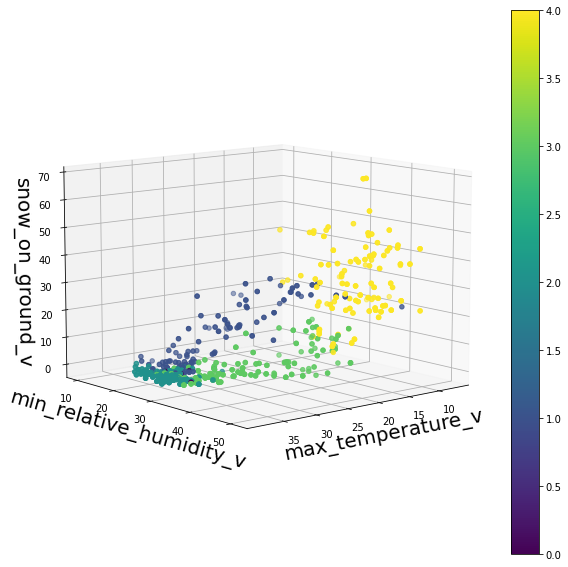

In [223]:
import pylab as p
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
x1=X['max_temperature_v'].to_numpy()
y1=X['min_relative_humidity_v'].to_numpy()
z1=X['snow_on_ground_v'].to_numpy()
z1 = z1.reshape(x1.shape)
h1=y.to_numpy()

datamin=min(h1)
datamax=max(h1)
fig=p.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
pmf = ax.scatter(x1, y1, z1, c=h1)
p.colorbar(pmf)

ax.set_xlabel('max_temperature_v', fontsize=20, rotation=150)
ax.set_ylabel('min_relative_humidity_v', fontsize=20, rotation=150)
ax.set_zlabel('snow_on_ground_v', fontsize=20, rotation=150)



ax.view_init(elev=10, azim=50)
p.show()